<a href="https://colab.research.google.com/github/bharathchandrareddy/urban-sound-classification/blob/main/urban_sound-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd


/content


In [1]:
##unziping the data
!unzip "drive/MyDrive/dataset/train.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Train/1674.wav          
  inflating: Train/1675.wav          
  inflating: Train/1677.wav          
  inflating: Train/1678.wav          
  inflating: Train/1679.wav          
  inflating: Train/168.wav           
  inflating: Train/1680.wav          
  inflating: Train/1681.wav          
  inflating: Train/1686.wav          
  inflating: Train/1687.wav          
  inflating: Train/1688.wav          
  inflating: Train/1689.wav          
  inflating: Train/1690.wav          
  inflating: Train/1695.wav          
  inflating: Train/1697.wav          
  inflating: Train/1699.wav          
  inflating: Train/17.wav            
  inflating: Train/170.wav           
  inflating: Train/1701.wav          
  inflating: Train/1702.wav          
  inflating: Train/1703.wav          
  inflating: Train/1704.wav          
  inflating: Train/1705.wav          
  inflating: Train/1706.wav          
  inflating: Train/1708.wav          

In [3]:
#from ast import increment_lineno
import pandas as pd
import numpy as np
import librosa as lb    #this is used to visualilze audio data
import glob
import IPython.display as ipd   #to access audio files
%pylab inline
import matplotlib.pyplot as plt
import librosa.display
import random
from sklearn.preprocessing import LabelEncoder
#!pip install keras
#from keras.utils import np_utils



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
!pwd
data = pd.read_csv('drive/MyDrive/Urban Sound Dataset.csv')

/content


In [10]:
data.head(21)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


In [14]:
ipd.Audio('Train/24.wav')

In [10]:
## data analysis


In [15]:
filename = 'Train/11.wav'
y,sr = lb.load(filename)    #y = array of time series, sr=sampling rate(no of splits per second)
print('y=',y)
print('sr=',sr)
tempo, beat_frames = lb.beat.beat_track(y=y, sr=sr)
print('tempo = {:.2f} beats per second'.format(tempo))
print(beat_frames)

y= [ 0.02275668  0.04482289 -0.05851977 ... -0.19301456 -0.11333571
 -0.1472203 ]
sr= 22050
tempo = 112.35 beats per second
[  3  26  51  79 102 123]


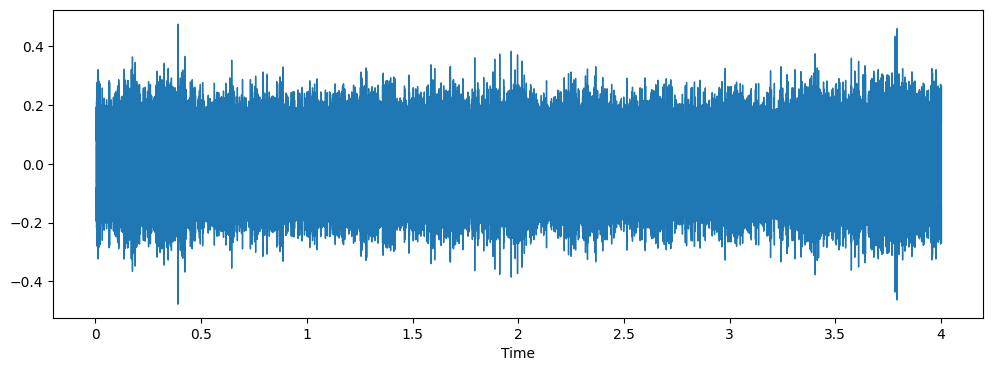

In [16]:
plt.figure(figsize=(12,4))
lb.display.waveshow(y,sr=sr)   #waveshow is the module of librosa.display function

3936
filename= Train/6359.wav
class =  siren
y= [0.03513331 0.06571987 0.06955212 ... 0.09852271 0.07887594 0.01767675]
sr= 22050
tempo = 143.55 beats per second
[ 3 21]


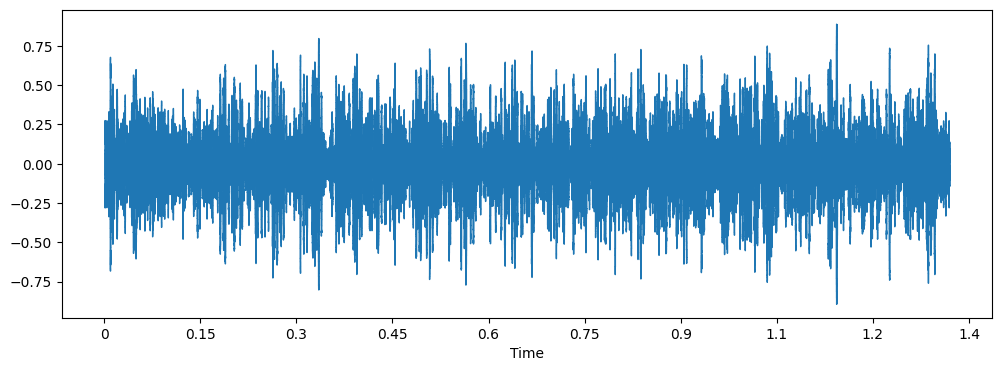

In [17]:
index = random.choice(data.index)
print(index)
filename = 'Train/'+str(data['ID'][index]) +'.wav'
print('filename=',filename)
print('class = ',data['Class'][index])
y,sr = lb.load(filename)    #y = array of time series, sr=sampling rate(no of splits per second)
print('y=',y)
print('sr=',sr)
tempo, beat_frames = lb.beat.beat_track(y=y, sr=sr)   #refer librosa doc
print('tempo = {:.2f} beats per second'.format(tempo))
print(beat_frames)
plt.figure(figsize=(12,4))
lb.display.waveshow(y,sr=sr)

In [18]:
ipd.Audio(filename)

[Text(0.5, 1.0, 'Linear-frequency power spectrogram')]

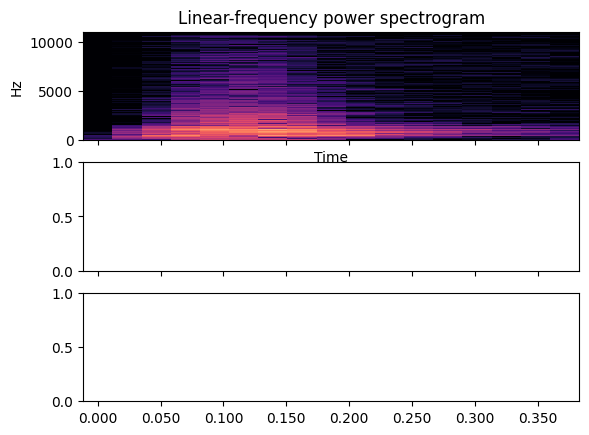

In [74]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
#ax[0].label_outer()

Splitting the data

the data is inn audio form. we need to convert it to an array and divide the audio into samples and extract features

In [19]:
import os
def parser(row):
  #name of the file
  file_name = os.path.join('Train',str(row.ID)+'.wav')
  x,sampling_rate = lb.load(file_name,res_type='soxr_hq')
  #feature extraction from the data
  mfcc = np.mean(lb.feature.mfcc(y=x,sr=sampling_rate,n_mfcc=40).T,axis=0)
  feature = mfcc
  label = row.Class

  return [feature,label]




In [20]:
f_data = data.apply(parser,axis=1)
f_data.columns = ['features','label']

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [21]:
f_data.head(5)

0    [[-74.75042, 128.71107, -31.76348, 14.368915, ...
1    [[-8.022534, 112.755035, -18.155668, 28.423483...
2    [[-114.8943, 2.8652442, -37.8351, -4.812474, -...
3    [[-212.26454, 87.15654, -53.341854, 10.725098,...
4    [[-235.51057, 132.81607, 42.24309, 18.182554, ...
dtype: object

In [22]:
X = np.array(list(zip(*f_data))[0])
y= np.array(list(zip(*f_data))[1])


In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [24]:
y.shape

(5435, 10)

model training

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten

num_classes = 10

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')



In [29]:
# train the model
model.fit(X, y, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
128/128 [==============================] - 1s 10ms/step - loss: 0.1495 - accuracy: 0.9529 - val_loss: 0.4885 - val_accuracy: 0.9154
Epoch 2/100
128/128 [==============================] - 1s 9ms/step - loss: 0.1827 - accuracy: 0.9455 - val_loss: 0.4041 - val_accuracy: 0.9146
Epoch 3/100
128/128 [==============================] - 1s 8ms/step - loss: 0.1717 - accuracy: 0.9497 - val_loss: 0.4753 - val_accuracy: 0.9132
Epoch 4/100
128/128 [==============================] - 1s 7ms/step - loss: 0.1537 - accuracy: 0.9531 - val_loss: 0.3949 - val_accuracy: 0.9176
Epoch 5/100
128/128 [==============================] - 1s 11ms/step - loss: 0.1472 - accuracy: 0.9531 - val_loss: 0.4428 - val_accuracy: 0.9154
Epoch 6/100
128/128 [==============================] - 2s 13ms/step - loss: 0.1325 - accuracy: 0.9551 - val_loss: 0.4929 - val_accuracy: 0.9139
Epoch 7/100
128/128 [==============================] - 2s 12ms/step - loss: 0.1000 - accuracy: 0.9686 - val_loss: 0.4296 - val_accuracy: 0.